# kertas batu gunung

import library

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Version check of tensorflow

In [21]:
print(tf.__version__)

2.2.0


In [22]:
# melakukan ekstraksi pada file zip
import zipfile,os

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/kertasbatugunting.zip

local_zip = '/tmp/kertasbatugunting.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'

--2020-07-29 06:22:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/kertasbatugunting.zip’

/tmp/kertasbatugunt 100%[===================>] 307.92M  8.79MB/s    in 45s     

2020-07-29 06:23:24 (6.81 MB/s) - ‘/tmp/kertasbatugunting.zip’ saved [322873683/322873683]



In [23]:
!pip install split-folders

import split_folders

split_folders.ratio(base_dir, output="output", seed=1337, ratio=(.6, .4))

Copying files: 2189 files [00:00, 4345.32 files/s]


In [24]:
import shutil
shutil.rmtree('output/val/rps-cv-images')
shutil.rmtree('output/train/rps-cv-images')

In [25]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=360,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=360,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [26]:
train_generator = train_datagen.flow_from_directory(
        'output/train',  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        'output/val', # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [29]:
modell = model.fit(
      train_generator,
      steps_per_epoch=30,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=3,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/30
30/30 [==============================] - 5s 150ms/step - loss: 1.1227 - accuracy: 0.3250 - val_loss: 1.0998 - val_accuracy: 0.4167
Epoch 2/30
30/30 [==============================] - 4s 144ms/step - loss: 1.1025 - accuracy: 0.3917 - val_loss: 1.0968 - val_accuracy: 0.1667
Epoch 3/30
30/30 [==============================] - 4s 145ms/step - loss: 1.0984 - accuracy: 0.3000 - val_loss: 1.0903 - val_accuracy: 0.3333
Epoch 4/30
30/30 [==============================] - 4s 145ms/step - loss: 1.2074 - accuracy: 0.3333 - val_loss: 1.0955 - val_accuracy: 0.4167
Epoch 5/30
30/30 [==============================] - 4s 145ms/step - loss: 1.0974 - accuracy: 0.3667 - val_loss: 1.0934 - val_accuracy: 0.2500
Epoch 6/30
30/30 [==============================] - 4s 145ms/step - loss: 1.1252 - accuracy: 0.3833 - val_loss: 1.0951 - val_accuracy: 0.5000
Epoch 7/30
30/30 [==============================] - 4s 146ms/step - loss: 1.0986 - accuracy: 0.3833 - val_loss: 1.0798 - val_accuracy: 0.5000
Epoch 

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 16)        2320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 72, 72, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 70, 70, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 33, 33, 64)       

In [31]:
 print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


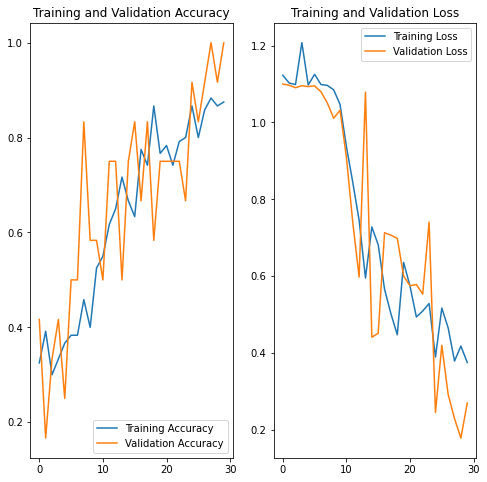

In [32]:
acc = modell.history['accuracy']
val_acc = modell.history['val_accuracy']

loss = modell.history['loss']
val_loss = modell.history['val_loss']

epochs_range = range(30)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving WhatsApp Image 2020-07-26 at 08.09.29.jpeg to WhatsApp Image 2020-07-26 at 08.09.29.jpeg
[[0. 0. 1.]]
WhatsApp Image 2020-07-26 at 08.09.29.jpeg
scissors


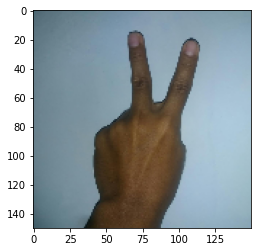

In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  print(classes)
  
  print(fn)
  if classes[0][0]>.5:
    print('paper')
  elif classes[0][1]>.5:
    print('rock')
  else:
    print('scissors')